In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_samples, silhouette_score

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv("Mall_Customers.csv")
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
df.shape

(200, 5)

In [5]:
# Chọn tất cả 5 cột
features = df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]

In [6]:
# Chuẩn hóa dữ liệu để đảm bảo các thuộc tính có cùng đơn vị đo
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features[['Annual Income (k$)', 'Spending Score (1-100)']])

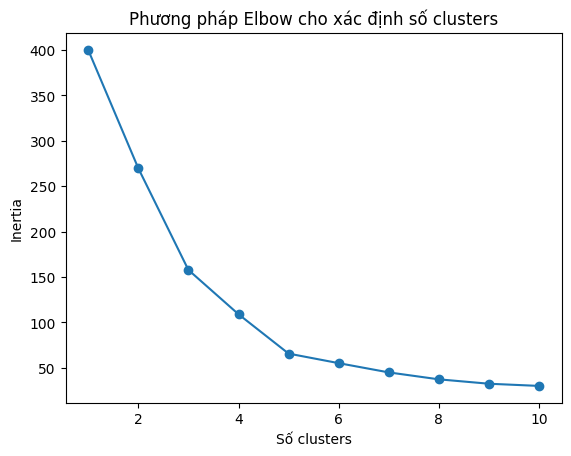

In [7]:
# Sử dụng phương pháp Elbow để xác định số clusters tối ưu
inertia = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(scaled_features)
    inertia.append(kmeans.inertia_)

# Vẽ đồ thị Elbow
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Phương pháp Elbow cho xác định số clusters')
plt.xlabel('Số clusters')
plt.ylabel('Inertia')
plt.show()

In [8]:
# Chọn số clusters dựa trên kết quả Elbow
num_clusters = 3

In [12]:
# Huấn luyện mô hình K-means với số clusters đã chọn
kmeans_model = KMeans(n_clusters=num_clusters, random_state=42)
kmeans_model.fit(scaled_features)

KMeans(n_clusters=3, random_state=42)

In [10]:
labels = kmeans_model.labels_
df['Cluster'] = labels
print(labels)

[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1
 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0
 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1]


In [14]:
# Hiển thị thông tin về số lượng điểm trong từng cluster
cluster_counts = df['Cluster'].value_counts().sort_index()
print("Number of points in each cluster:")
print(cluster_counts)

Number of points in each cluster:
Cluster
0     38
1     39
2    123
Name: count, dtype: int64


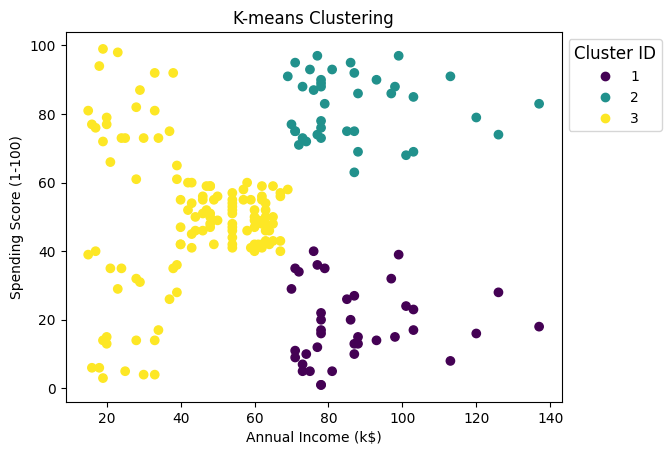

In [15]:
# Vẽ scatter plot
scatter = plt.scatter(df['Annual Income (k$)'], df['Spending Score (1-100)'], c=labels, cmap='viridis')
plt.title('K-means Clustering')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')

# Thêm ghi chú mã màu
legend_labels = [f'{i}' for i in range(1, 6)]  # Tạo nhãn cho các cụm
legend = plt.legend(handles=scatter.legend_elements()[0], title='Cluster ID', labels=legend_labels, loc='upper left', bbox_to_anchor=(1, 1))
legend.get_title().set_fontsize('12')

# Hiển thị biểu đồ
plt.show()

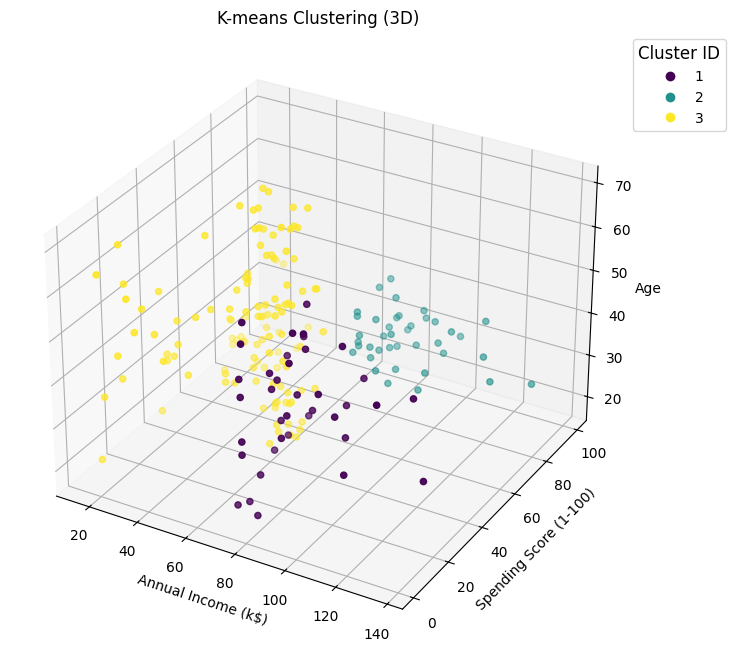

In [16]:
# Input 13: Vẽ scatter plot 3D
fig_3d = plt.figure(figsize=(12, 8))
ax_3d = fig_3d.add_subplot(111, projection='3d')

scatter_3d = ax_3d.scatter(df['Annual Income (k$)'], df['Spending Score (1-100)'], df['Age'], c=labels, cmap='viridis')
ax_3d.set_title('K-means Clustering (3D)')
ax_3d.set_xlabel('Annual Income (k$)')
ax_3d.set_ylabel('Spending Score (1-100)')
ax_3d.set_zlabel('Age')

# Thêm ghi chú mã màu
legend_labels_3d = [f'{i}' for i in range(1, 6)]  # Tạo nhãn cho các cụm
legend_3d = ax_3d.legend(handles=scatter_3d.legend_elements()[0], title='Cluster ID', labels=legend_labels_3d, loc='upper left', bbox_to_anchor=(1, 1))
legend_3d.get_title().set_fontsize('12')

# Hiển thị biểu đồ 3D
plt.show()

In [17]:
# Tính toán silhouette_score cho mỗi điểm dữ liệu
silhouette_values = silhouette_samples(scaled_features, labels)

In [18]:
# Tính toán silhouette_score trung bình
silhouette_avg = silhouette_score(scaled_features, labels)

# In ra kết quả silhouette_score trung bình
print(f"Silhouette Score: {silhouette_avg}")

Silhouette Score: 0.46658474419000145


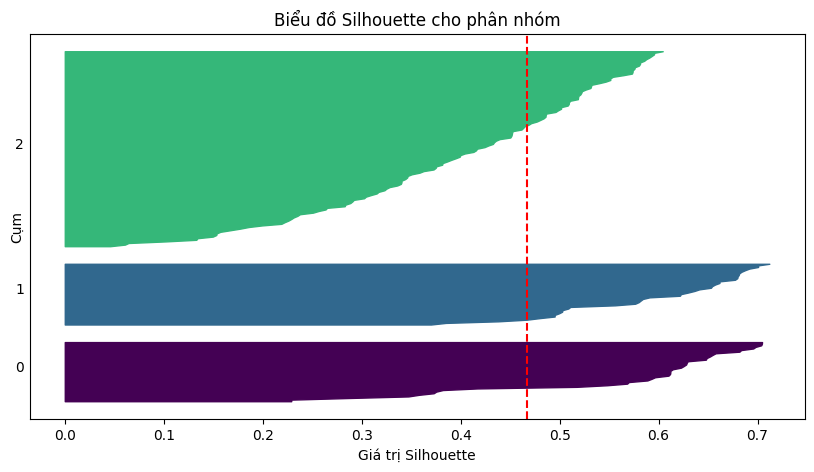

In [19]:
# Vẽ biểu đồ Silhouette
fig, ax = plt.subplots(figsize=(10, 5))
y_lower = 10
for i in range(num_clusters):
    cluster_i_values = silhouette_values[labels == i]
    cluster_i_values.sort()

    size_cluster_i = cluster_i_values.shape[0]
    y_upper = y_lower + size_cluster_i

    color = plt.cm.viridis(float(i) / num_clusters)
    ax.fill_betweenx(np.arange(y_lower, y_upper),
                      0, cluster_i_values,
                      facecolor=color, edgecolor=color, alpha=1.0)

    # Đặt nhãn cho cụm
    ax.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
    y_lower = y_upper + 10  # Khoảng trống giữa các cụm

ax.set_title("Biểu đồ Silhouette cho phân nhóm")
ax.set_xlabel("Giá trị Silhouette")
ax.set_ylabel("Cụm")

# Hiển thị silhouette_score trung bình
ax.axvline(x=silhouette_avg, color="red", linestyle="--")
ax.set_yticks([])  # Xóa nhãn cụm trên trục y
plt.show()